## Relatório Regressão Polinomial

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from models.polynomial_regression.polynomial_regression import PolynomialRegression
from sklearn.model_selection import train_test_split



### Regressão polinomial matematicamente:
$w = (X^T X)^{-1} X^T y$

A única diferença da regressão linear OLS é que agora aplicamos polinomios aos dados de entrada. 


### Exemplo:

Polinomio = 2,
então X será:

[x1,x2,x3 ... xi],[x1^2,x2^2,x3^2 ... xi^2].

Isso faz com que agora invés de termos uma reta que generaliza os dados, temos uma curva polinomial, como mostrado na figura abaixo.

![Vemos que quanto mais aumentamos o polinomio mais a curva se acentua](../references/polynomial_curve.png)

### Objetivo do código:
1. Testar o uso de um algoritmo de regressão polinomial com polinomios indo de grau 1 até 11.
2. Testar esse cenário com regularização e sem regularização.


In [4]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [5]:
df = pd.read_csv('../data/processed/boston.csv', delimiter=",", header=None)

X, y = df.iloc[:, :13], df.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressão Polinomial sem regularização

In [6]:
rmse_test = []
rmse_train = []

for i in range(1, 12):
    model = PolynomialRegression(i)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    predictions_test = model.predict(X_test.to_numpy())
    predictions_train = model.predict(X_train.to_numpy())
    
    rmse_test.append(rmse(predictions_test, y_test.to_numpy()))
    rmse_train.append(rmse(predictions_train, y_train.to_numpy()))

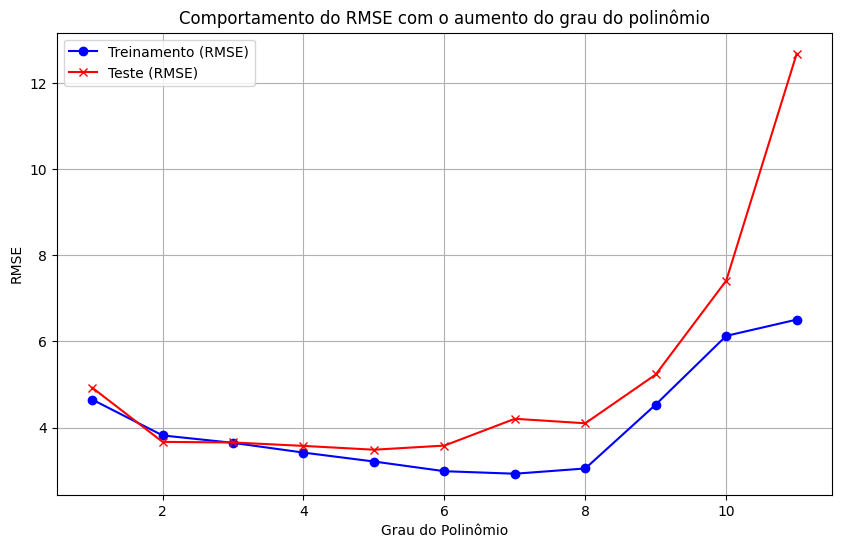

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 12), rmse_train, color='blue', label='Treinamento (RMSE)', marker='o')
plt.plot(range(1, 12), rmse_test, color='red', label='Teste (RMSE)', marker='x')

plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('Comportamento do RMSE com o aumento do grau do polinômio')

plt.legend()

plt.grid(True)
plt.show()

### Regressão polinomial com regularização:
$w = (X^T X + \lambda I)^{-1} X^T y$

In [8]:
rmse_test = []
rmse_train = []

for i in range(1, 12):
    model = PolynomialRegression(i)
    model.fit_l2(X_train.to_numpy(), y_train.to_numpy(), lambda_reg= 0.01)
    predictions_test = model.predict(X_test.to_numpy())
    predictions_train = model.predict(X_train.to_numpy())
    
    rmse_test.append(rmse(predictions_test, y_test.to_numpy()))
    rmse_train.append(rmse(predictions_train, y_train.to_numpy()))

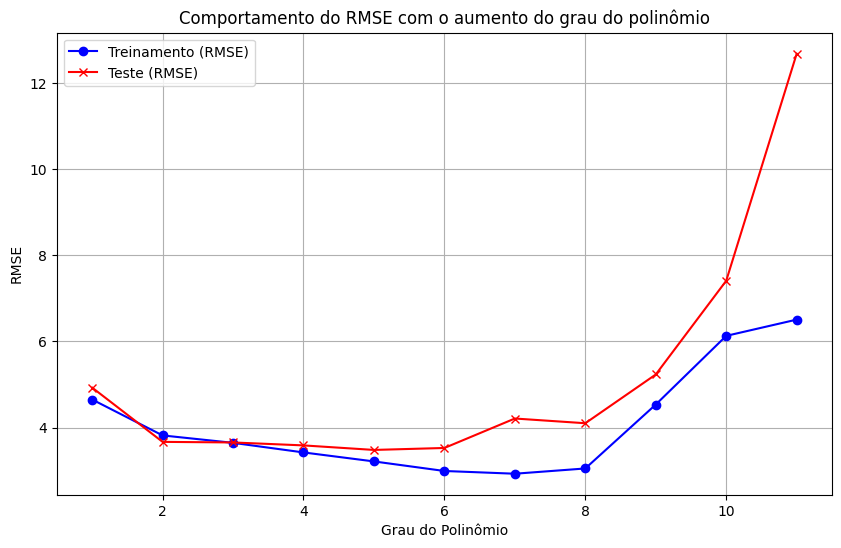

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(range(1, 12), rmse_train, color='blue', label='Treinamento (RMSE)', marker='o')
plt.plot(range(1, 12), rmse_test, color='red', label='Teste (RMSE)', marker='x')

plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('Comportamento do RMSE com o aumento do grau do polinômio')

plt.legend()

plt.grid(True)
plt.show()


## Gauss

Teste de regressão polinomial para o dataset de gauss com 1 feature

In [14]:
df = pd.read_csv("../data/processed/gauss.csv")

X, y = df['x'], df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rmse_test = []
for i in range(1, 21):
    model = PolynomialRegression(i)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = model.predict(X_test.to_numpy())
    rmse_test.append(rmse(y_test,y_pred))


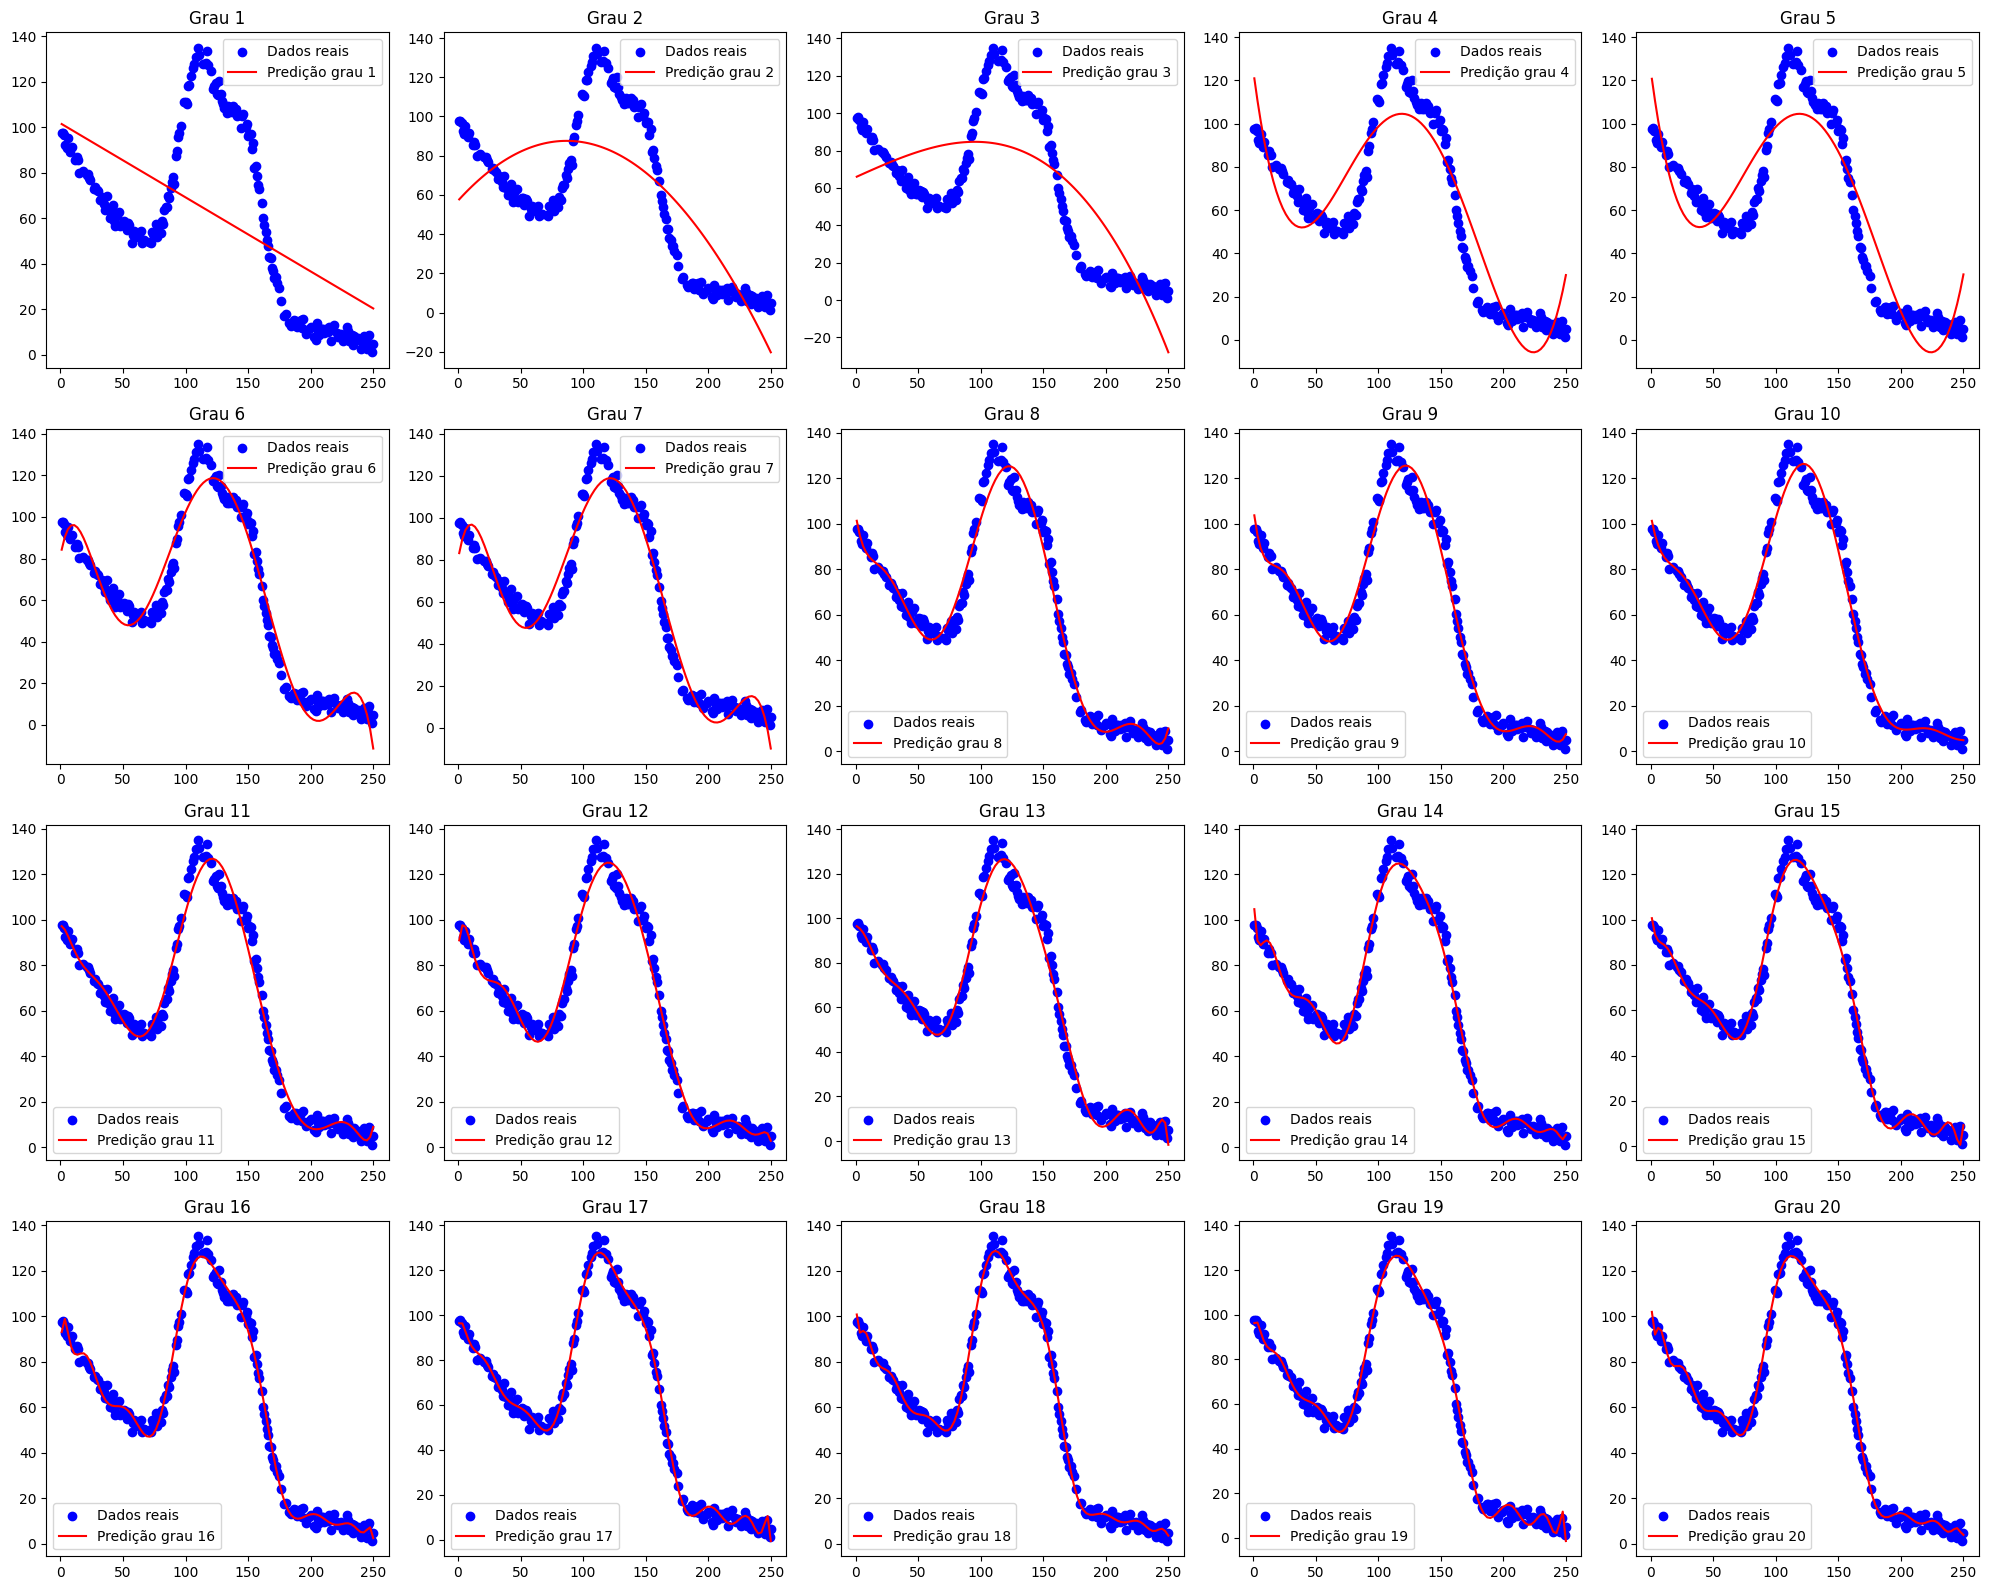

O melhor grau de polinômio é o 18 com RMSE = 3.4498594762029855


In [12]:
rmse_test = []

fig, axes = plt.subplots(4, 5, figsize=(20, 16))  
axes = axes.flatten()  

best_rmse = float('inf')
best_degree = -1

for i in range(1, 21):
    model = PolynomialRegression(i)  
    model.fit(X_train.to_numpy(), y_train.to_numpy())  
    
    
    X_all = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  
    y_pred_all = model.predict(X_all)
    
    axes[i-1].scatter(X_train, y_train, color='blue', label='Dados reais')  
    axes[i-1].plot(X_all, y_pred_all, color='red', label=f'Predição grau {i}')  
    axes[i-1].set_title(f'Grau {i}')  
    axes[i-1].legend()  
    
    y_pred_test = model.predict(X_test.to_numpy())
    rmse_value = rmse(y_test.to_numpy(), y_pred_test)  
    
    rmse_test.append(rmse_value)

    if rmse_value < best_rmse:
        best_rmse = rmse_value
        best_degree = i

plt.tight_layout()
plt.show()


print(f'O melhor grau de polinômio é o {best_degree} com RMSE = {best_rmse}')

In [13]:
for i, rmse in enumerate(rmse_test):
    print(f'para o polinomio {i+1} tem rmse {rmse}')

para o polinomio 1 tem rmse 34.58165166994404
para o polinomio 2 tem rmse 28.559997802382476
para o polinomio 3 tem rmse 29.09478137377635
para o polinomio 4 tem rmse 17.173180938927143
para o polinomio 5 tem rmse 17.18447572001247
para o polinomio 6 tem rmse 8.372545730326028
para o polinomio 7 tem rmse 8.34355447747216
para o polinomio 8 tem rmse 5.7085025279269335
para o polinomio 9 tem rmse 5.60099041166338
para o polinomio 10 tem rmse 5.390315035441861
para o polinomio 11 tem rmse 5.429366925985188
para o polinomio 12 tem rmse 5.5190291729715035
para o polinomio 13 tem rmse 5.299965512452421
para o polinomio 14 tem rmse 4.4937884200592935
para o polinomio 15 tem rmse 4.120105888578411
para o polinomio 16 tem rmse 3.8634831439791464
para o polinomio 17 tem rmse 3.8977482205961844
para o polinomio 18 tem rmse 3.4498594762029855
para o polinomio 19 tem rmse 4.354959325377954
para o polinomio 20 tem rmse 4.039586097694284
